In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import classes.nb_general_2 as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

# Does Personalization come out the same for NB-pr and PR?

In [5]:
# pagerank.py
"""Volume 1: The Page Rank Algorithm.
<Cory Glover>
<Math 347>
<3/6/18>
"""
import numpy as np
from scipy import linalg as la
from scipy.sparse import dok_matrix




# Problem 3
def iter_solve(adj, N=None, d=.85, tol=1E-5, p = None):
    """Return the page ranks of the network described by 'adj'.
    Iterate through the PageRank algorithm until the error is less than 'tol'.

    Parameters:
        adj (ndarray): The adjacency matrix of a directed graph.
        N (int): Restrict the computation to the first 'N' nodes of the graph.
            If N is None (default), use the entire matrix.
        d (float): The damping factor, a float between 0 and 1.
        tol (float): Stop iterating when the change in approximations to the
            solution is less than 'tol'.

    Returns:
        The approximation to the steady state.
    """

    D = np.diag(list(adj.sum(axis=1)))
    K = la.inv(D)@adj
    # Initialize 1 vector
    if p is None:
        p = np.ones((N,1))
    # Create p(0)
    p0 = np.random.random((N,1))
    # Create p(1)
    p1 = d*K@p0 +  (1-d)/N*p
    # Test for convergence
    while la.norm(p1-p0) >= tol:
        # Create p(t) and p(t+1)
        p0 = p1
        p1 = d*K@p0 + (1-d)/N*p
    return p1
    #raise NotImplementedError("Problem 3 Incomplete")





In [15]:
def make_comparison(G, eps=.7):
    # Find L, R, and B
    A = nx.to_numpy_array(G)
    L, T = NB_G.create_s_t(G)
    R = T.T
    C, B = NB_G.to_edge_space(G,graph=True,B = True)
    B_tilde = nx.to_numpy_array(B)
    rho = np.random.choice(np.arange(1,11), size=A.shape[0])
    rho = rho/la.norm(rho, ord=1)
#     e1 = np.zeros(len(G.nodes()))
#     e1[-1] = 1
#     print(R@la.inv(R.T@R)@e1)
#     print(la.inv(np.eye(B_tilde.shape[0])-eps*la.inv(np.diag(B_tilde.sum(axis=1)))@B_tilde)@R@e1)

    # We divide by A.shape[0] under the assumption there is NO source nodes
    edge_pi = R@la.inv(R.T@R)@np.ones(R.shape[1])/A.shape[0]
    edge_pi = R@rho
    edge_pi = edge_pi/la.norm(edge_pi, ord=1)
#     edge_pi = R@e1
#     edge_pi = edge_pi/la.norm(edge_pi, ord=1)
    
    # Make it into a dictionary
    vertex_personalization = {}
    for i, val in zip(list(G.nodes()),rho):
        vertex_personalization[i] = val
        
    edge_personalization = {}
    for i, val in zip(list(C.nodes()),edge_pi):
        edge_personalization[i] = val
    
    # Cory iter-solve
#     itervertex = iter_solve(nx.adjacency_matrix(G.to_directed()).todense(),p=rho)
    
    # Get it for vertex space
    vertex_pr = nx.pagerank(G, alpha=eps, max_iter=250, personalization=vertex_personalization)
    vertex_pr = np.array([vertex_pr[i] for i in vertex_pr])
    
    # Get it for edge space
    edge_pr = nx.pagerank(C, alpha=eps, max_iter=250, personalization=edge_personalization)
    edge_pr = np.array([edge_pr[i] for i in edge_pr])
    edge_pr = R.T@edge_pr
    
    # Get edge space, wrong personalization
    edge_pr_ = nx.pagerank(C, alpha=eps, max_iter=250)
    edge_pr_ = np.array([edge_pr_[i] for i in edge_pr_])
    edge_pr_ = R.T@edge_pr_

    return vertex_pr, edge_pr, edge_pr_, #itervertex

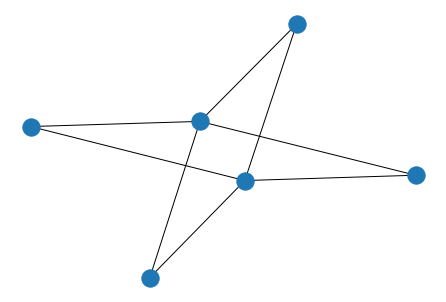

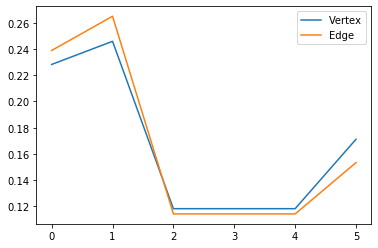

This should be true: False
This should be true: False
0.019111811487586006


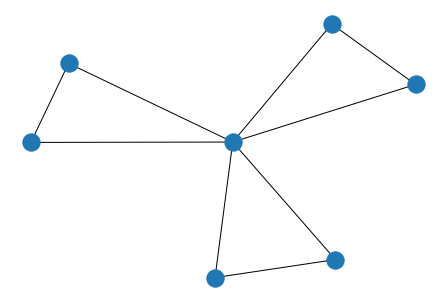

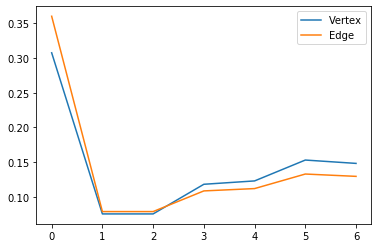

This should be true: False
This should be true: False
0.052700735818867916


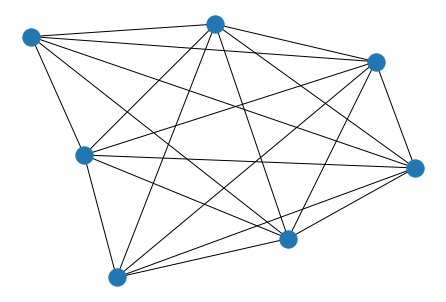

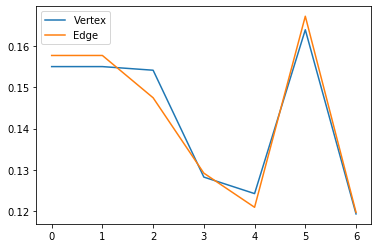

This should be true: False
This should be true: False
0.006701326681303965


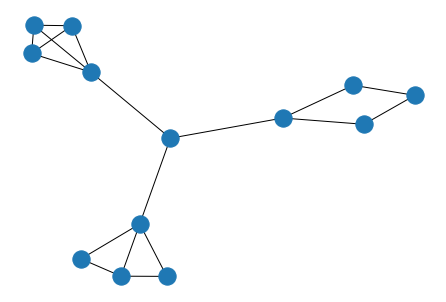

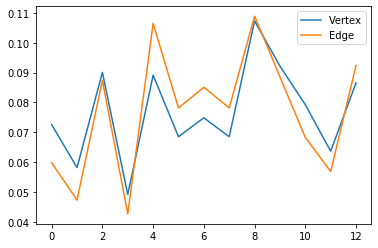

This should be true: False
This should be true: False
0.017324110187767944


In [16]:
for i in range(4):
    G = nx.read_gml("graph_{}.gml".format(i))
    nx.draw(G)
    plt.show()
    vertex, edge, edge_naive = make_comparison(G)
    plt.plot(vertex, label='Vertex')
    plt.plot(edge, label='Edge')
#     plt.plot(edge_naive, label='Naive Edge')
#     plt.plot(itervertex, label='Iterative Vertex')
    plt.legend(loc='best')
    plt.show()
    print("This should be true: {}".format(np.allclose(vertex, edge)))
    print("This should be true: {}".format(np.allclose(edge, edge_naive)))
    print(la.norm(vertex-edge, ord=np.inf))

1. Results still don't seem to look like they should
2. In some cases edge personalization undershoots, in others it overshoots
3. Perhaps I make an iterative solver by hand to check?

In [57]:
for k in range(10):
    V = np.random.randint(5,11)
    E = np.random.randint(V+1, V*(V-1))
    G = nx.gnm_random_graph(np.random.randin)
    nx.draw(G)
    plt.show()

AttributeError: module 'numpy.random' has no attribute 'randin'

In [8]:
R

NameError: name 'R' is not defined